In [1]:
# !pip install statsmodels
import numpy as np # Mathematical Calculations
import pandas as pd # Data operations and summaries
import seaborn as sns # Good data visualizations
import matplotlib.pyplot as plt # basic Visualizations
import statsmodels.api as sm # Statistical Models
import warnings
warnings.simplefilter(action='ignore')
from scipy import stats

In [2]:
heart = pd.read_csv("heart.csv")

In [8]:
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [14]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Preliminary Checks

In [7]:
len(heart) # Number of Rows in the data

918

In [8]:
heart.shape # Number of rows and columns

(918, 12)

In [9]:
heart.head(10)# Extract the top n observations from the data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [10]:
heart.tail(10) # Extracts the last n observations

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [11]:
heart.sample(10) # Randomly checking some observations in the middle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
744,60,M,ASY,117,230,1,Normal,160,Y,1.4,Up,1
37,41,F,ATA,110,250,0,ST,142,N,0.0,Up,0
478,57,M,ASY,130,311,1,ST,148,Y,2.0,Flat,1
471,68,M,ASY,138,0,0,Normal,130,Y,3.0,Flat,1
842,43,F,ASY,132,341,1,LVH,136,Y,3.0,Flat,1
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
878,49,M,ATA,130,266,0,Normal,171,N,0.6,Up,0
600,57,M,ASY,130,207,0,ST,96,Y,1.0,Flat,0
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
253,62,M,ATA,140,271,0,Normal,152,N,1.0,Up,0


In [12]:
heart.sample(frac = 0.01)# Extract randomly some defined percentage of observations

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
280,60,M,NAP,120,246,0,LVH,135,N,0.0,Up,0
393,38,M,ASY,150,0,1,Normal,120,Y,0.7,Flat,1
825,59,M,TA,170,288,0,LVH,159,N,0.2,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1
824,37,M,NAP,130,250,0,Normal,187,N,3.5,Down,0
283,55,F,ATA,110,344,0,ST,160,N,0.0,Up,0
135,49,M,NAP,115,265,0,Normal,175,N,0.0,Flat,1
760,53,M,ASY,123,282,0,Normal,95,Y,2.0,Flat,1
603,74,M,ASY,155,310,0,Normal,112,Y,1.5,Down,1


In [13]:
heart.iloc[[590,357,446]]# Try to get the entire details of a selected row

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
590,63,M,ATA,136,165,0,ST,133,N,0.2,Up,0
357,53,M,ATA,120,0,0,Normal,95,N,0.0,Flat,1
446,54,M,ASY,130,0,0,ST,117,Y,1.4,Flat,1


In [14]:
heart.columns # Display the names of the columns
# Advisable to change the names of the columns especially when there is no clarity in the names or when there are spaces in the names

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [15]:
heart.rename(columns={ 'HeartDisease':'Target', 'FastingBS':'Fasting_Blood_Sugar'},inplace=True)# Renames the columns

In [16]:
heart.sort_values(by="MaxHR", ascending=False).head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,Fasting_Blood_Sugar,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
753,34,F,ATA,118,210,0,Normal,192,N,0.7,Up,0
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0


In [17]:
heart.sort_values(by=["MaxHR", "Cholesterol"], ascending=[False, True]).head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,Fasting_Blood_Sugar,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
753,34,F,ATA,118,210,0,Normal,192,N,0.7,Up,0
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0


In [18]:
heart[(heart["Target"] == 0) | (heart["ChestPainType"] == "ASY")]["Cholesterol"].max() #

603

In [19]:
heart.info()# Gives information on Missing values, Data Types
# Check whether any of the columns differ in their data type from what is typically expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  918 non-null    int64  
 1   Sex                  918 non-null    object 
 2   ChestPainType        918 non-null    object 
 3   RestingBP            918 non-null    int64  
 4   Cholesterol          918 non-null    int64  
 5   Fasting_Blood_Sugar  918 non-null    int64  
 6   RestingECG           918 non-null    object 
 7   MaxHR                918 non-null    int64  
 8   ExerciseAngina       918 non-null    object 
 9   Oldpeak              918 non-null    float64
 10  ST_Slope             918 non-null    object 
 11  Target               918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [20]:
heart["Target"] = heart["Target"].astype("object") # CHange the data type of the object
heart["Fasting_Blood_Sugar"] = heart["Fasting_Blood_Sugar"].astype("object")

In [21]:
heart.describe()# Descriptive Statistics of the columns (Numerical columns)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [22]:
heart.describe(include=['O']) # Basic summary of categorical columns

,Sex,ChestPainType,Fasting_Blood_Sugar,RestingECG,ExerciseAngina,ST_Slope,Target
count,918,918,918,918,918,918,918
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,725,496,704,552,547,460,508


In [23]:
heart.nunique() # Unique number of values in each column

Age                     50
Sex                      2
ChestPainType            4
RestingBP               67
Cholesterol            222
Fasting_Blood_Sugar      2
RestingECG               3
MaxHR                  119
ExerciseAngina           2
Oldpeak                 53
ST_Slope                 3
Target                   2
dtype: int64

In [24]:
heart.apply(np.max)

Age                     77
Sex                      M
ChestPainType           TA
RestingBP              200
Cholesterol            603
Fasting_Blood_Sugar      1
RestingECG              ST
MaxHR                  202
ExerciseAngina           Y
Oldpeak                6.2
ST_Slope                Up
Target                   1
dtype: object

In [25]:
heart.skew()#symmetricity of the data

Age                   -0.195933
RestingBP              0.179839
Cholesterol           -0.610086
Fasting_Blood_Sugar    1.264484
MaxHR                 -0.144359
Oldpeak                1.022872
Target                -0.215086
dtype: float64

In [26]:
heart.kurtosis() # Peaked nature of the data ..The deviation of the data from normality

Age                   -0.386140
RestingBP              3.271251
Cholesterol            0.118208
Fasting_Blood_Sugar   -0.401960
MaxHR                 -0.448248
Oldpeak                1.203064
Target                -1.958008
dtype: float64

In [27]:
# To be covered
heart["MaxHR"].apply(lambda x:(x^3-x^2)/(x+1)).head()

0   -0.040462
1   -0.044586
2   -0.636364
3   -0.064220
4   -0.121951
Name: MaxHR, dtype: float64

In [28]:
cat_columns = heart.select_dtypes(include='object').columns
num_columns = heart.select_dtypes(exclude='object').columns

# Display the Frequency of each of the categories in the cateogircal columns
for var in cat_columns: 
    
    print(heart[var].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
0    704
1    214
Name: Fasting_Blood_Sugar, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
1    508
0    410
Name: Target, dtype: int64


In [29]:
for var in cat_columns: 
    
    print(heart[var].value_counts(normalize=True))
    print(heart[[var, "Target"]].groupby(var, as_index=False).mean().sort_values(by='Target', ascending=False))

M    0.78976
F    0.21024
Name: Sex, dtype: float64
  Sex    Target
1   M  0.631724
0   F  0.259067
ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64
  ChestPainType    Target
0           ASY  0.790323
3            TA  0.434783
2           NAP  0.354680
1           ATA  0.138728
0    0.766885
1    0.233115
Name: Fasting_Blood_Sugar, dtype: float64
   Fasting_Blood_Sugar    Target
1                    1  0.794393
0                    0  0.480114
Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64
  RestingECG    Target
2         ST  0.657303
0        LVH  0.563830
1     Normal  0.516304
N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64
  ExerciseAngina    Target
1              Y  0.851752
0              N  0.351005
Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64
  ST_Slope    Target
1     Flat  0.828261
0     Down  0.777778
2       Up  0.197468
1    0.

ValueError: Grouper for 'Target' not 1-dimensional

In [30]:
cat_columns

Index(['Sex', 'ChestPainType', 'Fasting_Blood_Sugar', 'RestingECG',
       'ExerciseAngina', 'ST_Slope', 'Target'],
      dtype='object')

In [31]:
for var in num_columns: 
    
    print("The descriptive statistics for ",var, " are ",stats.describe(heart[var]))
    

The descriptive statistics for  Age  are  DescribeResult(nobs=918, minmax=(28, 77), mean=53.510893246187365, variance=88.9742541630732, skewness=-0.19561273124487544, kurtosis=-0.3905684960842244)
The descriptive statistics for  RestingBP  are  DescribeResult(nobs=918, minmax=(0, 200), mean=132.39651416122004, variance=342.77390277569896, skewness=0.17954532149156327, kurtosis=3.2469319615478724)
The descriptive statistics for  Cholesterol  are  DescribeResult(nobs=918, minmax=(0, 603), mean=198.7995642701525, variance=11964.891079417346, skewness=-0.6090891046626045, kurtosis=0.11103677697582448)
The descriptive statistics for  MaxHR  are  DescribeResult(nobs=918, minmax=(60, 202), mean=136.80936819172112, variance=648.2286144313537, skewness=-0.14412342991429325, kurtosis=-0.4523389391469048)
The descriptive statistics for  Oldpeak  are  DescribeResult(nobs=918, minmax=(-2.6, 6.2), mean=0.8873638344226579, variance=1.1375718871093816, skewness=1.0211999031135828, kurtosis=1.189992199

In [32]:
# Errors replacing them with blank values (Data Validation)

heart['RestingBP'][heart['RestingBP']==0] = np.nan
heart['Cholesterol'][heart['Cholesterol'] == 0] = np.nan
heart['Oldpeak'][heart['Oldpeak'] < 0] = np.nan
#heart['Oldpeak'] = np.abs(heart['Oldpeak'])
heart['Age'][heart['Age'] > 100] = np.nan

#Winsorization
# Adjust to the minimum or the maximum value

In [33]:
# Any category with less than 20 occurrences, I will replace them with blanks

for var in cat_columns: 
    
    insuf_Values = heart[var].value_counts()[heart[var].value_counts()<20].reset_index()
    heart[var][heart[var].isin(insuf_Values["index"])] = np.nan


In [34]:
# Count the number of missing values ine ach column
heart.isnull().sum().sort_values(ascending=False)

Cholesterol            172
Oldpeak                 13
RestingBP                1
Age                      0
Sex                      0
ChestPainType            0
Fasting_Blood_Sugar      0
RestingECG               0
MaxHR                    0
ExerciseAngina           0
ST_Slope                 0
Target                   0
dtype: int64

In [35]:
# In case you want to delete a column
#heart.drop(["Cholesterol"],axis=1, inplace = True)

In [36]:
# Replace blanks with minimum value
heart['Oldpeak'].fillna(heart['Oldpeak'].min(),inplace = True)
heart['Cholesterol'].fillna(heart['Cholesterol'].median(),inplace = True)

In [37]:
heart['ChestPainType'].value_counts().idxmax()

'ASY'

In [38]:
# Replacing a blank in a categorical variable with the mode of that category
heart["ChestPainType"].fillna(heart['ChestPainType'].value_counts().idxmax(), inplace=True)

In [39]:
# Remove the missing rows
heart.dropna(axis=0, inplace = True)

In [40]:
# Create new Features
heart['Chol_BP'] = heart['Cholesterol'] / heart['RestingBP']

round(heart['Chol_BP'].mean(),2)

1.86

In [41]:
# Usage of Lambda (Alternative defining function separately and use it separately)
print('ST_Slope - Total Count')
heart['ST_Slope'].apply(lambda num:num[:1]).value_counts()[:3]

ST_Slope - Total Count


F    459
U    395
D     63
Name: ST_Slope, dtype: int64

In [42]:
# One categorical One numerical column - Descriptive Statistics across the categories
for var in cat_columns: 
    print(heart.groupby(var).mean())

           Age   RestingBP  Cholesterol       MaxHR   Oldpeak   Chol_BP
Sex                                                                    
F    52.492228  132.212435   254.704663  146.139896  0.668912  1.954266
M    53.780387  132.628453   240.147790  134.296961  0.962431  1.839157
                     Age   RestingBP  Cholesterol       MaxHR   Oldpeak  \
ChestPainType                                                             
ASY            54.959677  133.229839   246.850806  128.477823  1.179234   
ATA            49.242775  130.624277   242.635838  150.208092  0.307514   
NAP            53.301980  131.608911   237.133663  143.178218  0.689604   
TA             54.826087  136.413043   232.826087  147.891304  1.054348   

                Chol_BP  
ChestPainType            
ASY            1.882905  
ATA            1.877945  
NAP            1.832735  
TA             1.732721  
                           Age   RestingBP  Cholesterol       MaxHR   Oldpeak  \
Fasting_Blood_Sugar     

In [43]:
print("Variable ----Maximum Value ----- Maximum Value Location")
for var in num_columns: 
    print(var, "-----", heart[var].max(), "-----",heart[var].idxmax())    

Variable ----Maximum Value ----- Maximum Value Location
Age ----- 77 ----- 447
RestingBP ----- 200.0 ----- 241
Cholesterol ----- 603.0 ----- 149
MaxHR ----- 202 ----- 829
Oldpeak ----- 6.2 ----- 850


In [44]:
#Another Filter Example
heart[heart['Cholesterol'].between(100,200,inclusive=True)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,Fasting_Blood_Sugar,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target,Chol_BP
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,1.125000
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,1.300000
11,58,M,ATA,136.0,164.0,0,ST,99,Y,2.0,Flat,1,1.205882
16,38,M,ASY,110.0,196.0,0,Normal,166,N,0.0,Flat,1,1.781818
21,44,M,ATA,120.0,184.0,0,Normal,142,N,1.0,Flat,0,1.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,41,M,ATA,120.0,157.0,0,Normal,182,N,0.0,Up,0,1.308333
911,59,M,ASY,164.0,176.0,1,LVH,90,N,1.0,Flat,1,1.073171
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1,1.340278
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1,1.007692


In [45]:
from itertools import product
cat1 = heart[cat_columns]
cat2 = heart[cat_columns]
cat_var_prod = list(product(cat1,cat2, repeat = 1))
cat_var_prod

[('Sex', 'Sex'),
 ('Sex', 'ChestPainType'),
 ('Sex', 'Fasting_Blood_Sugar'),
 ('Sex', 'RestingECG'),
 ('Sex', 'ExerciseAngina'),
 ('Sex', 'ST_Slope'),
 ('Sex', 'Target'),
 ('ChestPainType', 'Sex'),
 ('ChestPainType', 'ChestPainType'),
 ('ChestPainType', 'Fasting_Blood_Sugar'),
 ('ChestPainType', 'RestingECG'),
 ('ChestPainType', 'ExerciseAngina'),
 ('ChestPainType', 'ST_Slope'),
 ('ChestPainType', 'Target'),
 ('Fasting_Blood_Sugar', 'Sex'),
 ('Fasting_Blood_Sugar', 'ChestPainType'),
 ('Fasting_Blood_Sugar', 'Fasting_Blood_Sugar'),
 ('Fasting_Blood_Sugar', 'RestingECG'),
 ('Fasting_Blood_Sugar', 'ExerciseAngina'),
 ('Fasting_Blood_Sugar', 'ST_Slope'),
 ('Fasting_Blood_Sugar', 'Target'),
 ('RestingECG', 'Sex'),
 ('RestingECG', 'ChestPainType'),
 ('RestingECG', 'Fasting_Blood_Sugar'),
 ('RestingECG', 'RestingECG'),
 ('RestingECG', 'ExerciseAngina'),
 ('RestingECG', 'ST_Slope'),
 ('RestingECG', 'Target'),
 ('ExerciseAngina', 'Sex'),
 ('ExerciseAngina', 'ChestPainType'),
 ('ExerciseAngina',

In [46]:
# Cross Tabulations of the categorical variables
for var1 in cat_columns:
    for var2 in cat_columns:
        print(pd.crosstab(heart[var1], heart[var2], normalize=True))


Sex         F         M
Sex                    
F    0.210469  0.000000
M    0.000000  0.789531
ChestPainType       ASY       ATA       NAP        TA
Sex                                                  
F              0.076336  0.065431  0.057797  0.010905
M              0.464558  0.123228  0.162486  0.039258
Fasting_Blood_Sugar         0         1
Sex                                    
F                    0.182116  0.028353
M                    0.584515  0.205016
RestingECG       LVH    Normal        ST
Sex                                     
F           0.051254  0.128680  0.030534
M           0.153762  0.472192  0.163577
ExerciseAngina         N         Y
Sex                               
F               0.163577  0.046892
M               0.431843  0.357688
ST_Slope      Down      Flat        Up
Sex                                   
F         0.007634  0.081788  0.121047
M         0.061069  0.418757  0.309706
Target         0         1
Sex                       
F       0.1559

In [47]:
import scipy.stats as ss
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            heart[i[0]], heart[i[1]])))[1]))
result
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "coef"])
chi_test_output

,var1,var2,coef
0,Sex,ChestPainType,4.611131e-08
1,Sex,Fasting_Blood_Sugar,3.839046e-04
2,Sex,RestingECG,8.888447e-02
3,Sex,ExerciseAngina,1.141909e-08
4,Sex,ST_Slope,1.948323e-05
5,Sex,Target,5.280956e-20
6,ChestPainType,Sex,4.611131e-08
7,ChestPainType,Fasting_Blood_Sugar,3.013534e-05
8,ChestPainType,RestingECG,3.619803e-03
9,ChestPainType,ExerciseAngina,1.605697e-38


In [48]:
# Correlation between two numerical variables
heart.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Chol_BP
Age,1.000000,0.263084,0.045556,-0.382280,0.261383,-0.099818
RestingBP,0.263084,1.000000,0.086062,-0.109693,0.162387,-0.455190
Cholesterol,0.045556,0.086062,1.000000,-0.001510,0.054002,0.837171
MaxHR,-0.382280,-0.109693,-0.001510,1.000000,-0.172266,0.053698
Oldpeak,0.261383,0.162387,0.054002,-0.172266,1.000000,-0.041945
Chol_BP,-0.099818,-0.455190,0.837171,0.053698,-0.041945,1.000000


In [51]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
for var in num_columns: 
    print(Zscore_outlier(heart[var]))

Outliers: []
None
Outliers: [190.0, 200.0, 200.0, 200.0, 190.0, 200.0, 192.0]
None
Outliers: [468.0, 518.0, 412.0, 529.0, 466.0, 603.0, 404.0, 491.0, 458.0, 564.0, 407.0, 417.0, 409.0]
None
Outliers: [60]
None
Outliers: [5.0, 4.2, 5.6, 4.2, 6.2, 4.4]
None


In [52]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    
for var in num_columns: 
    print(iqr_outliers(heart[var]))

Outliers: []
None
Outliers: [190.0, 180.0, 180.0, 180.0, 200.0, 180.0, 180.0, 180.0, 80.0, 200.0, 185.0, 200.0, 180.0, 180.0, 178.0, 172.0, 180.0, 190.0, 174.0, 178.0, 180.0, 200.0, 192.0, 178.0, 180.0, 180.0, 172.0]
None
Outliers: [468.0, 518.0, 365.0, 412.0, 529.0, 100.0, 85.0, 392.0, 466.0, 129.0, 393.0, 388.0, 603.0, 404.0, 132.0, 117.0, 355.0, 491.0, 394.0, 126.0, 347.0, 358.0, 100.0, 458.0, 384.0, 349.0, 113.0, 110.0, 123.0, 369.0, 385.0, 564.0, 407.0, 417.0, 126.0, 354.0, 360.0, 409.0, 394.0, 353.0, 131.0]
None
Outliers: [63, 60]
None
Outliers: [4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.2, 4.0, 5.6, 3.8, 4.2, 6.2, 4.4, 4.0]
None


In [53]:
def Winsorization_outliers(df):
    out=[]
    q1 = df.quantile(0.01)
    q3 = df.quantile(0.99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)

for var in num_columns: 
    print(Winsorization_outliers(heart[var]))   

Outliers: [31, 29, 31, 28, 30, 29, 77, 75, 75, 76, 75, 76, 77, 29]
None
Outliers: [190.0, 92.0, 200.0, 95.0, 95.0, 95.0, 80.0, 95.0, 95.0, 95.0, 200.0, 185.0, 200.0, 190.0, 94.0, 200.0, 192.0, 94.0]
None
Outliers: [468.0, 518.0, 412.0, 529.0, 100.0, 85.0, 466.0, 129.0, 603.0, 117.0, 491.0, 126.0, 100.0, 458.0, 113.0, 110.0, 123.0, 564.0, 417.0, 126.0]
None
Outliers: [190, 188, 77, 72, 63, 60, 70, 67, 72, 69, 73, 71, 192, 195, 194, 187, 202, 190, 188]
None
Outliers: [5.0, 4.2, 5.6, 4.2, 6.2, 4.4]
None


In [54]:
def ZRscore_outlier(df):
    out=[]
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
for var in num_columns: 
    print(ZRscore_outlier(heart[var]))

Outliers: []
None
Outliers: [200.0, 200.0, 200.0, 200.0]
None
Outliers: [468.0, 518.0, 412.0, 529.0, 466.0, 603.0, 491.0, 458.0, 564.0, 417.0, 409.0]
None
Outliers: []
None
Outliers: [5.0, 5.6, 6.2]
None


In [55]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("No outliers\n")
    else:
        print("Outliers Exist\n")
        
for var in num_columns: 
    print(grubbs_test(heart[var]))

Grubbs Calculated Value: 2.704405121244936
Grubbs Critical Value: 4.018531362985077
No outliers

None
Grubbs Calculated Value: 3.7498255749879577
Grubbs Critical Value: 4.018531362985077
No outliers

None
Grubbs Calculated Value: 6.737497313609822
Grubbs Critical Value: 4.018531362985077
Outliers Exist

None
Grubbs Calculated Value: 3.0168864297727436
Grubbs Critical Value: 4.018531362985077
No outliers

None
Grubbs Calculated Value: 5.071567914640905
Grubbs Critical Value: 4.018531362985077
Outliers Exist

None


In [56]:
from sklearn.cluster import DBSCAN
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))

for var in num_columns: 
    print(DB_outliers(heart[var]))

0    917
Name: cluster, dtype: int64
None
 0    873
 1     17
 2     15
-1     12
Name: cluster, dtype: int64
None
 0    838
-1     52
 1     17
 2     10
Name: cluster, dtype: int64
None
 0    904
-1      7
 1      6
Name: cluster, dtype: int64
None
0    917
Name: cluster, dtype: int64
None


In [57]:
from sklearn.ensemble import IsolationForest
def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))
    
for var in num_columns: 
    Iso_outliers(heart[var])

 1    625
-1    292
Name: cluster, dtype: int64
 1    712
-1    205
Name: cluster, dtype: int64
 1    759
-1    158
Name: cluster, dtype: int64
 1    671
-1    246
Name: cluster, dtype: int64
 1    595
-1    322
Name: cluster, dtype: int64


## Visualizations

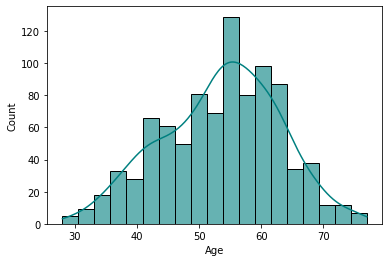

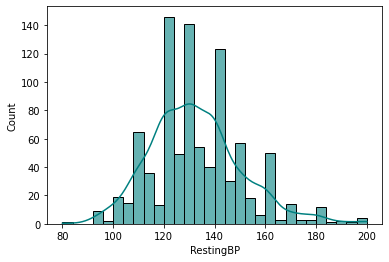

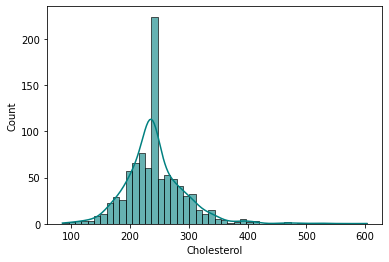

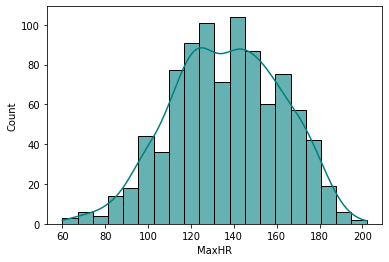

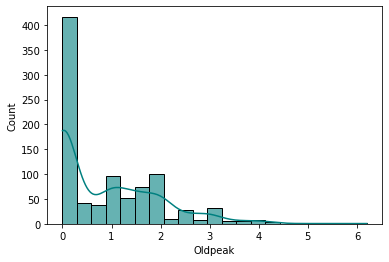

In [58]:
for var in num_columns: 
    plt.figure()
    sns.histplot(data = heart, x = var, kde = True, color='teal', alpha=0.6)

<Figure size 1080x576 with 0 Axes>

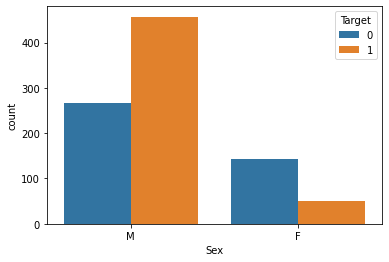

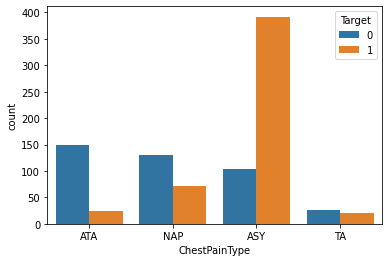

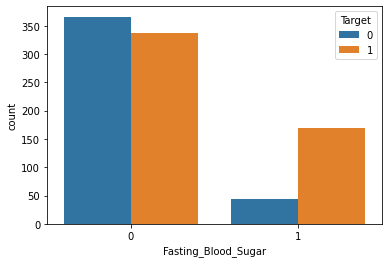

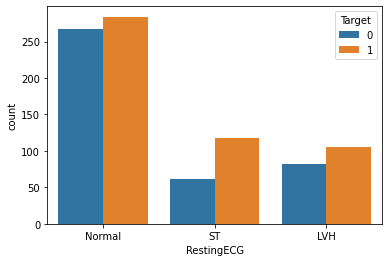

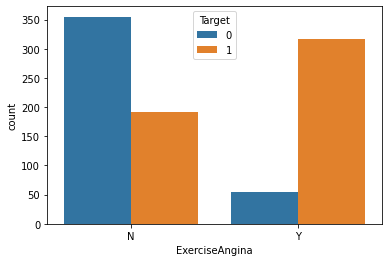

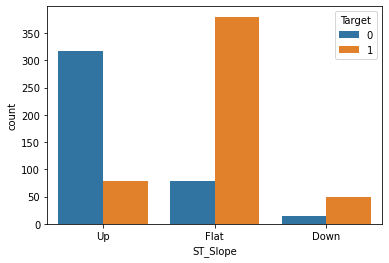

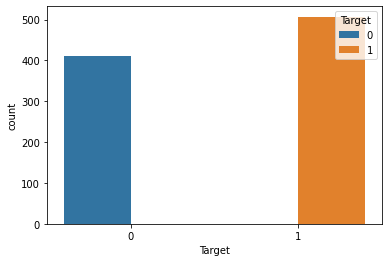

In [59]:
plt.figure(figsize=(15,8))
for var in cat_columns: 
    plt.figure()
    sns.countplot(data = heart, x = var,   hue = 'Target')

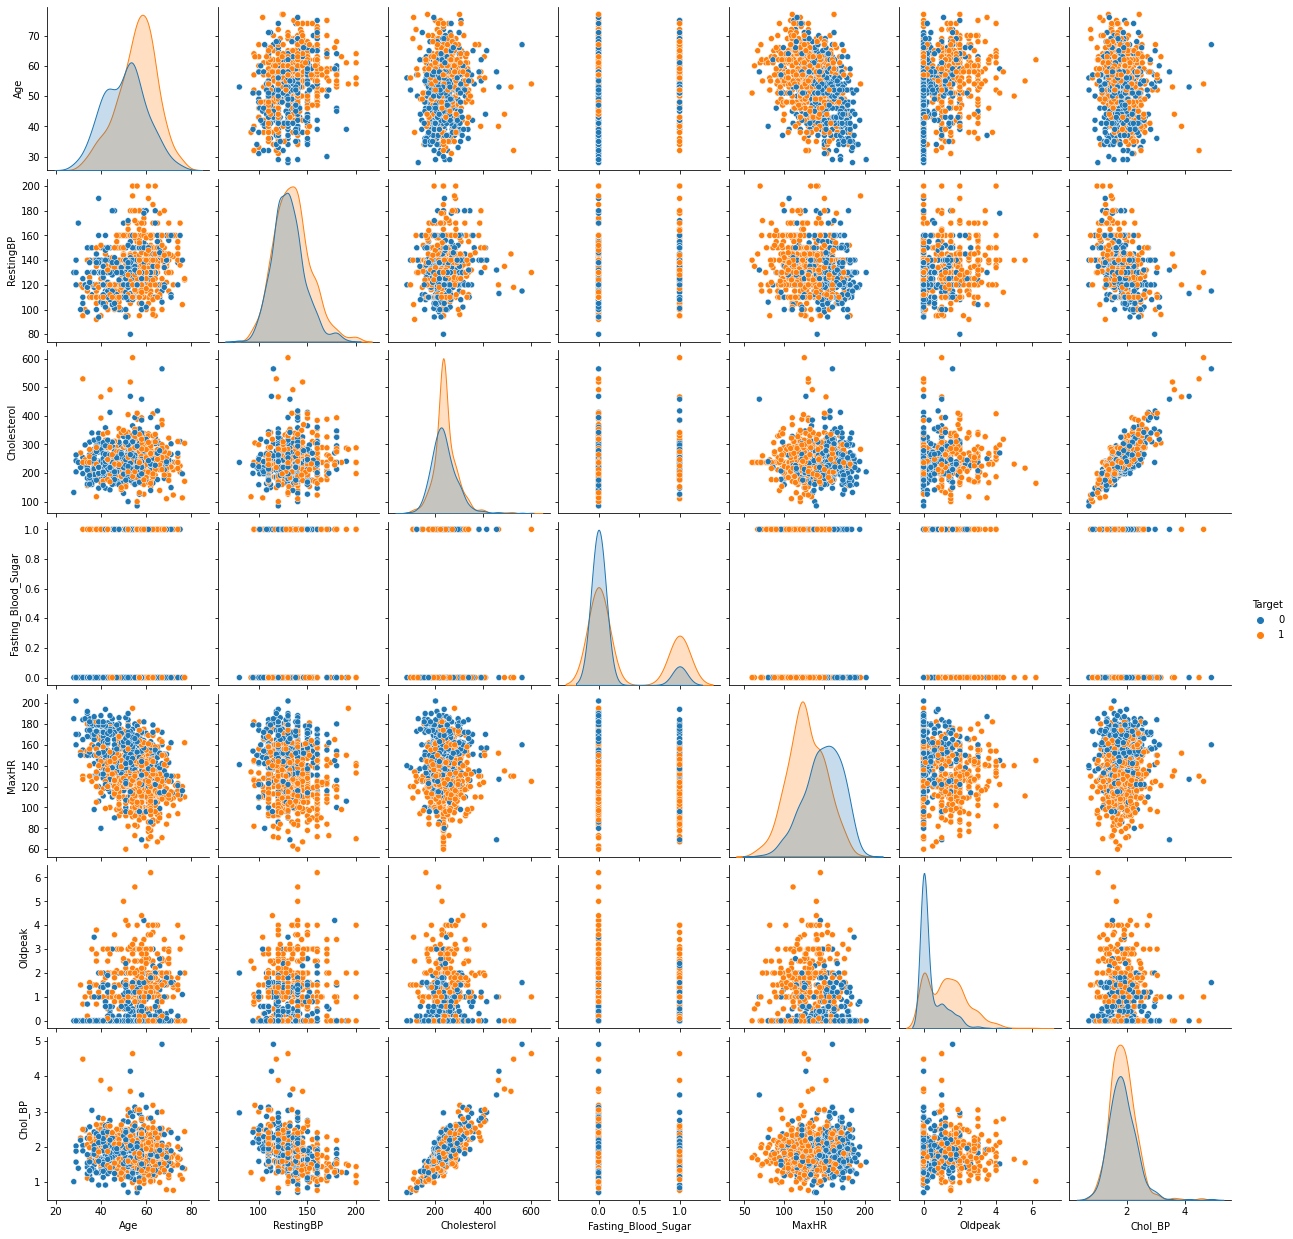

In [60]:
sns.pairplot(heart, hue='Target')

<Figure size 432x288 with 0 Axes>

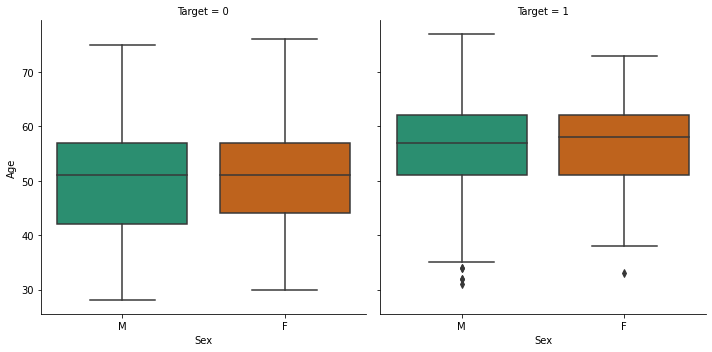

<Figure size 432x288 with 0 Axes>

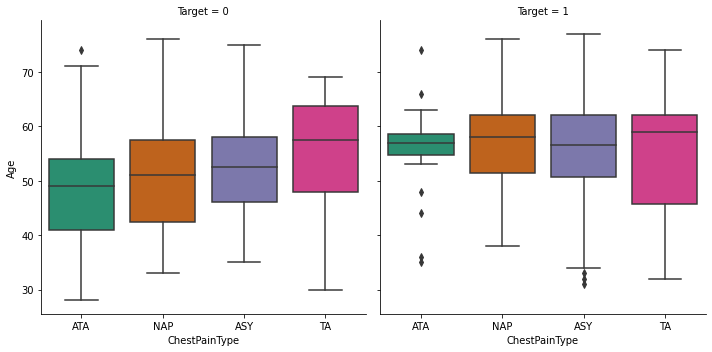

<Figure size 432x288 with 0 Axes>

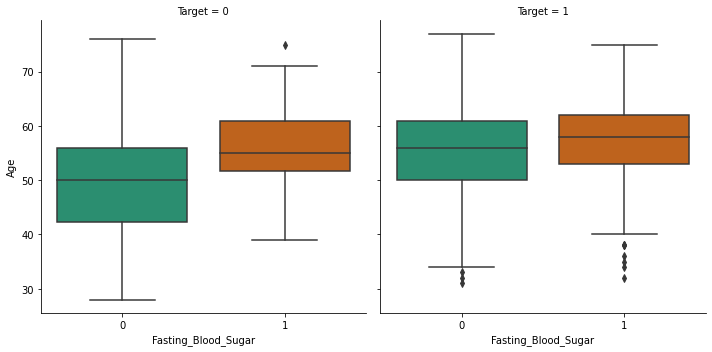

<Figure size 432x288 with 0 Axes>

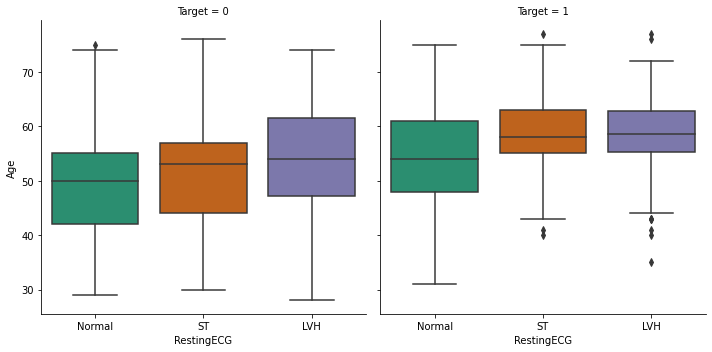

<Figure size 432x288 with 0 Axes>

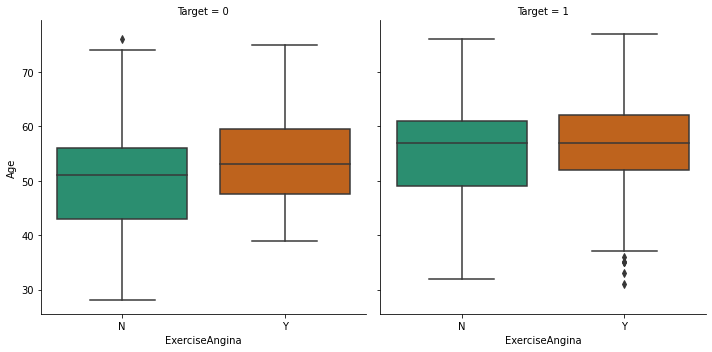

<Figure size 432x288 with 0 Axes>

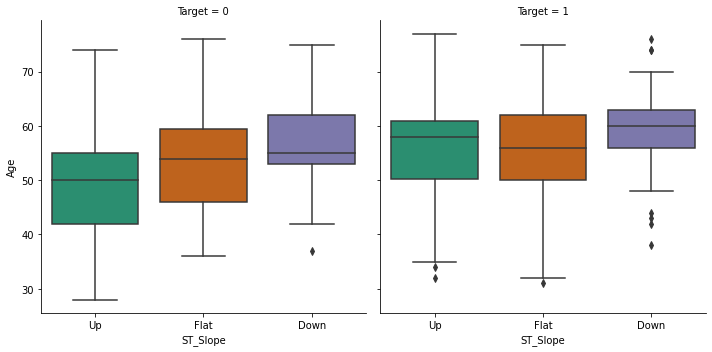

<Figure size 432x288 with 0 Axes>

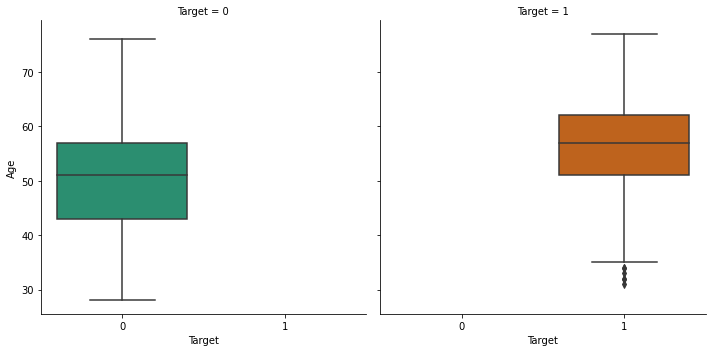

<Figure size 432x288 with 0 Axes>

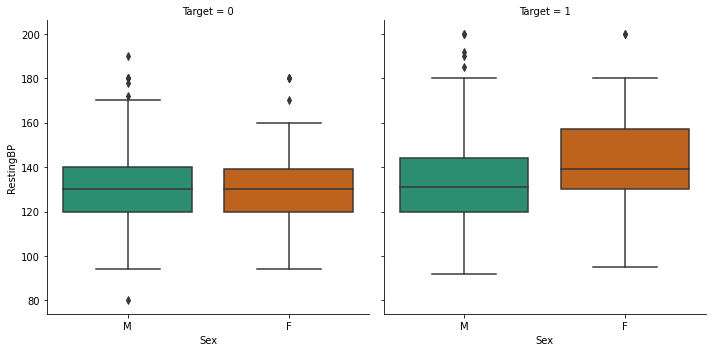

<Figure size 432x288 with 0 Axes>

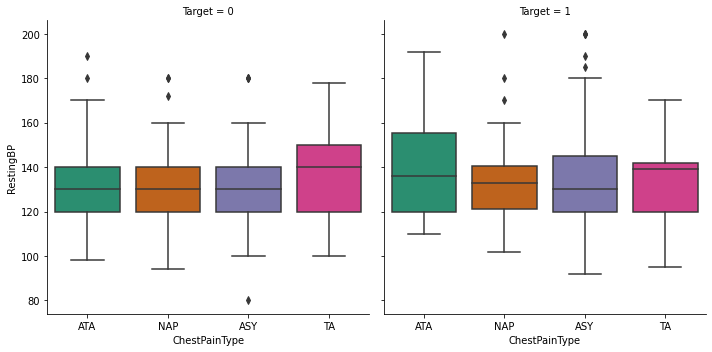

<Figure size 432x288 with 0 Axes>

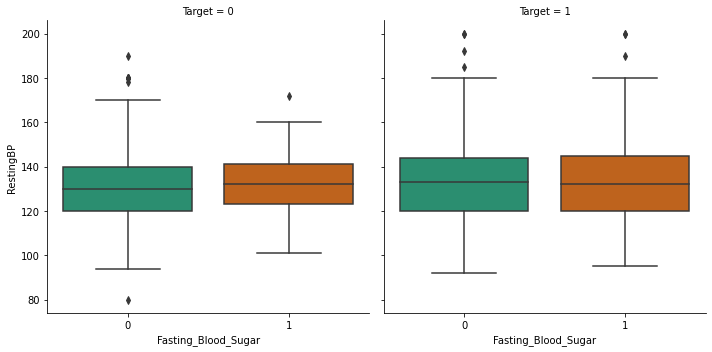

<Figure size 432x288 with 0 Axes>

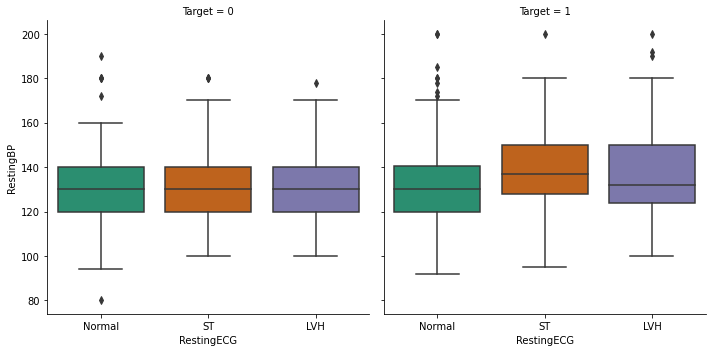

<Figure size 432x288 with 0 Axes>

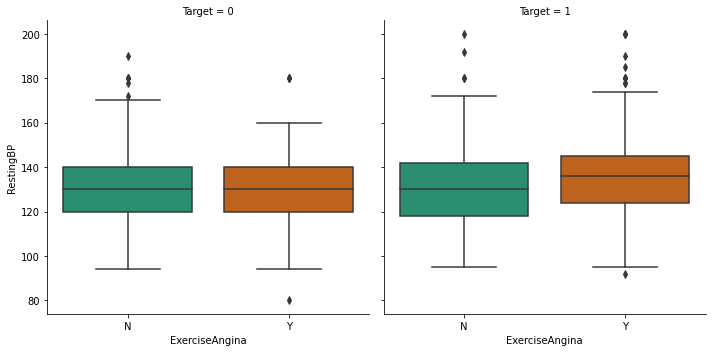

<Figure size 432x288 with 0 Axes>

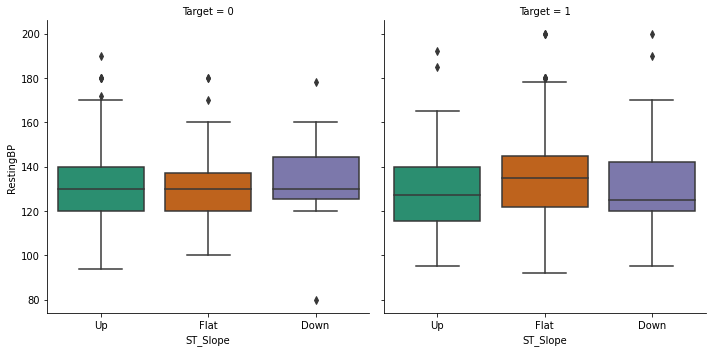

<Figure size 432x288 with 0 Axes>

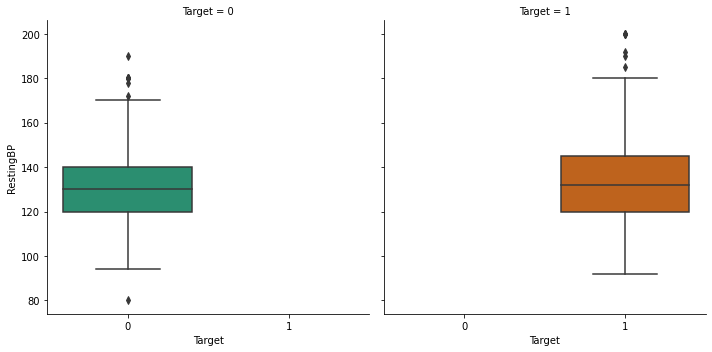

<Figure size 432x288 with 0 Axes>

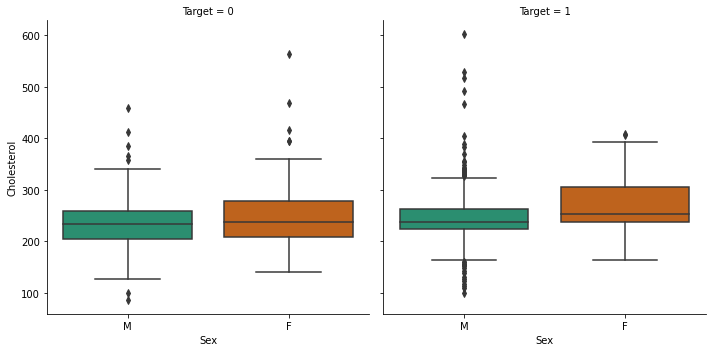

<Figure size 432x288 with 0 Axes>

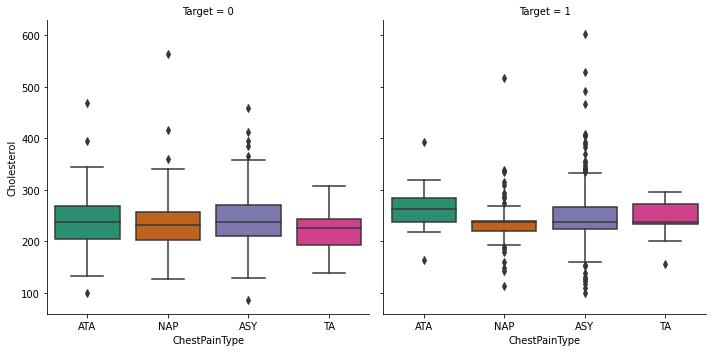

<Figure size 432x288 with 0 Axes>

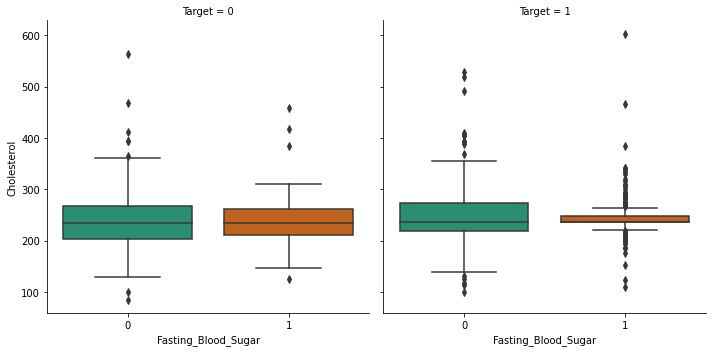

<Figure size 432x288 with 0 Axes>

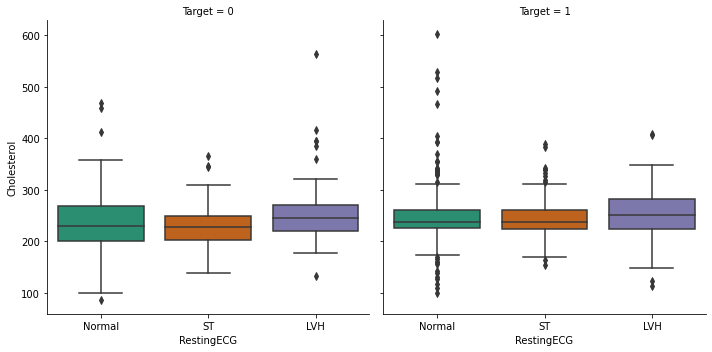

<Figure size 432x288 with 0 Axes>

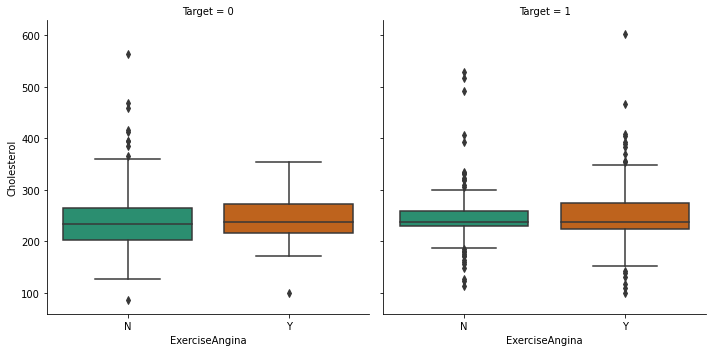

<Figure size 432x288 with 0 Axes>

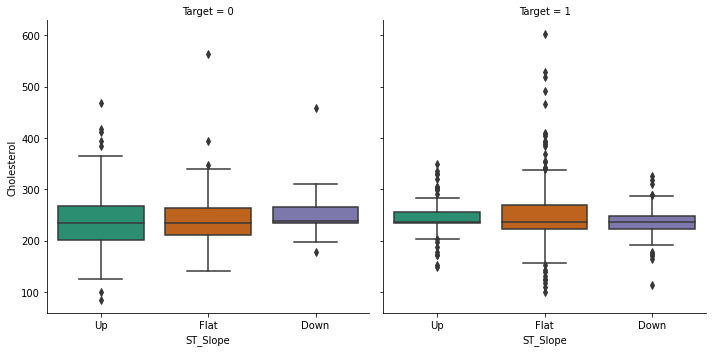

<Figure size 432x288 with 0 Axes>

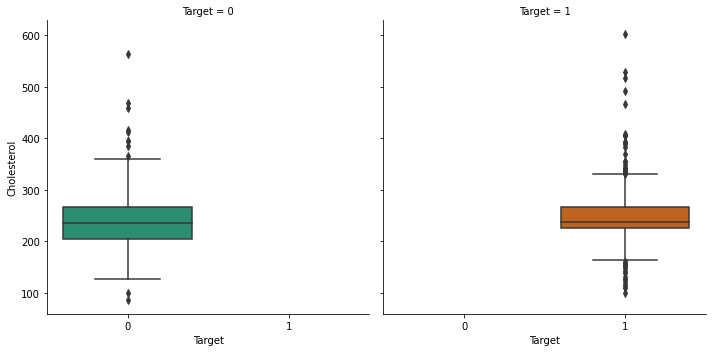

<Figure size 432x288 with 0 Axes>

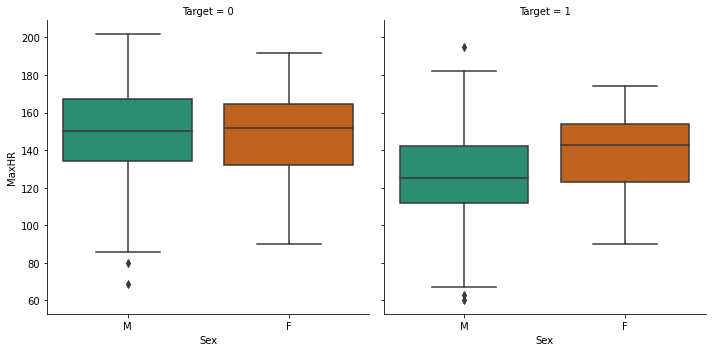

<Figure size 432x288 with 0 Axes>

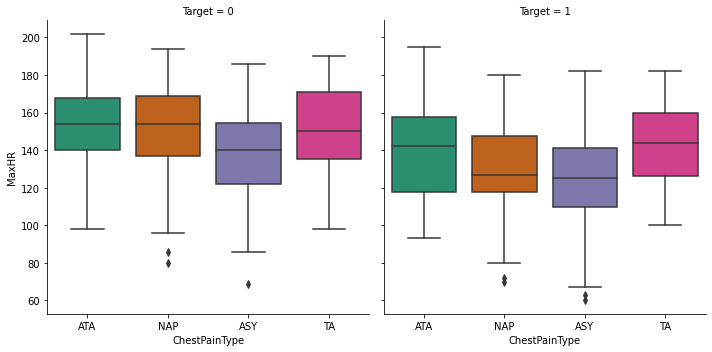

<Figure size 432x288 with 0 Axes>

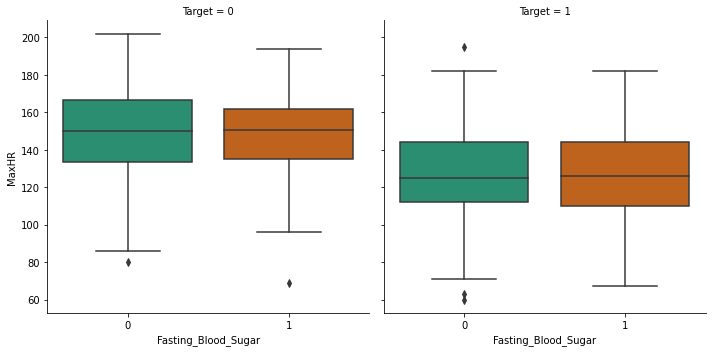

<Figure size 432x288 with 0 Axes>

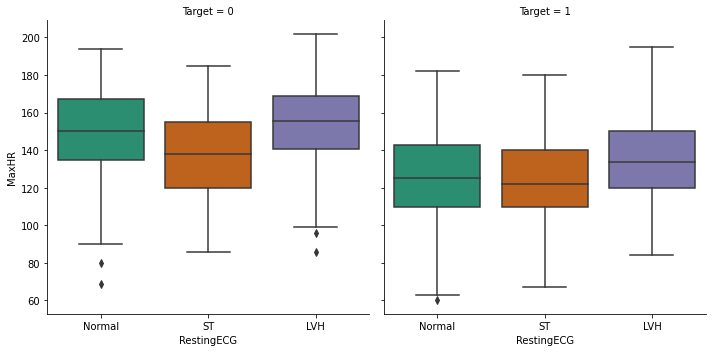

<Figure size 432x288 with 0 Axes>

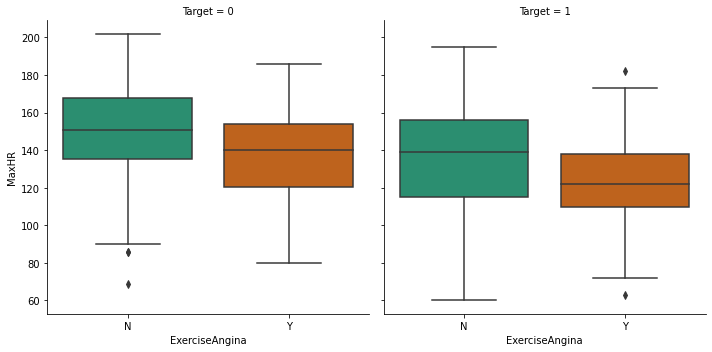

<Figure size 432x288 with 0 Axes>

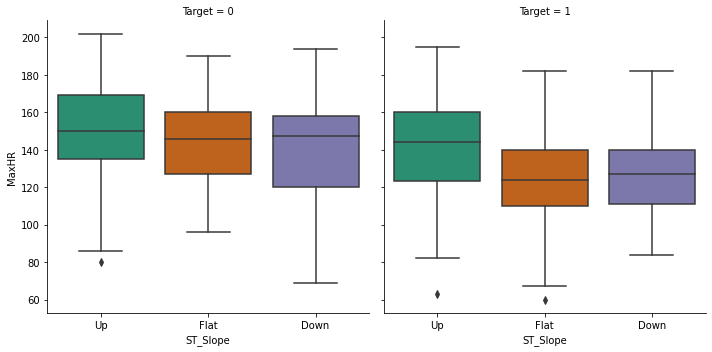

<Figure size 432x288 with 0 Axes>

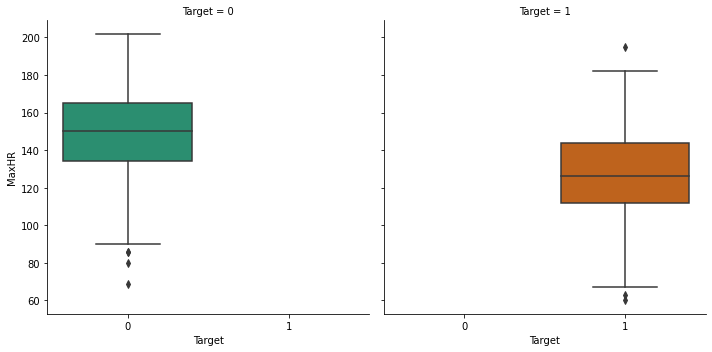

<Figure size 432x288 with 0 Axes>

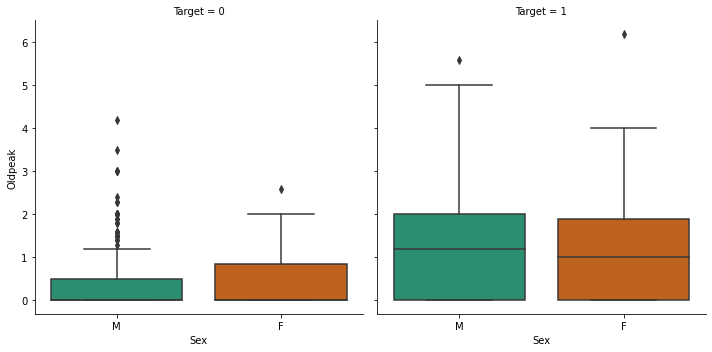

<Figure size 432x288 with 0 Axes>

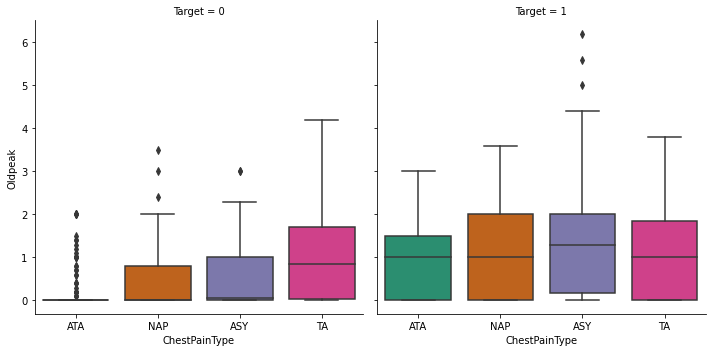

<Figure size 432x288 with 0 Axes>

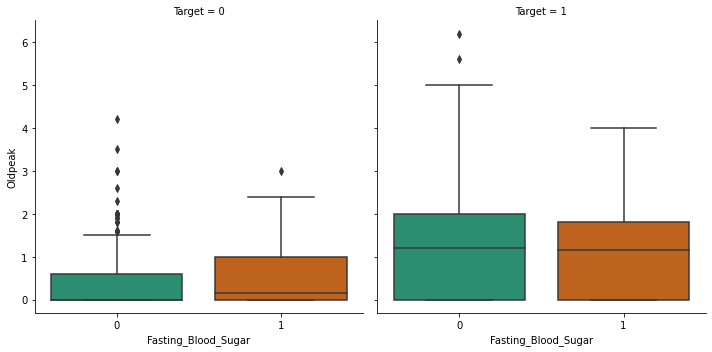

<Figure size 432x288 with 0 Axes>

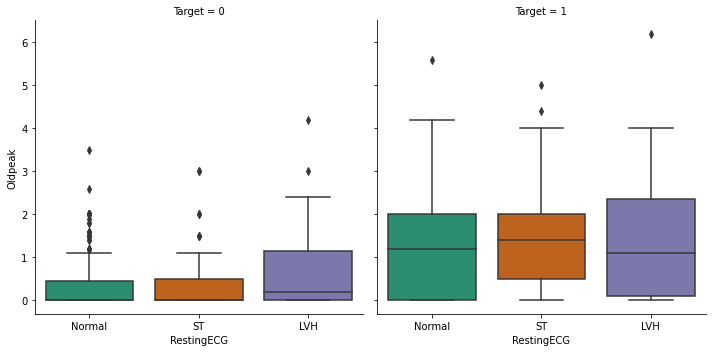

<Figure size 432x288 with 0 Axes>

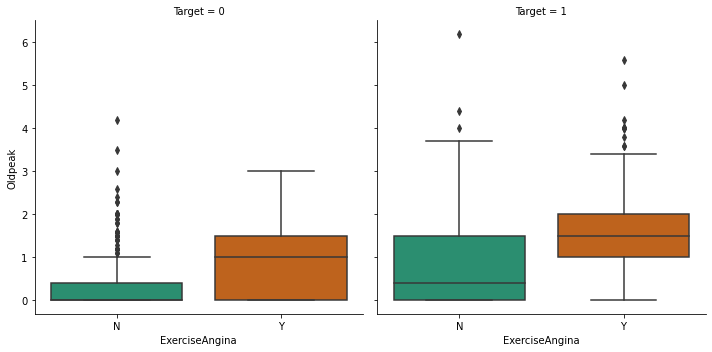

<Figure size 432x288 with 0 Axes>

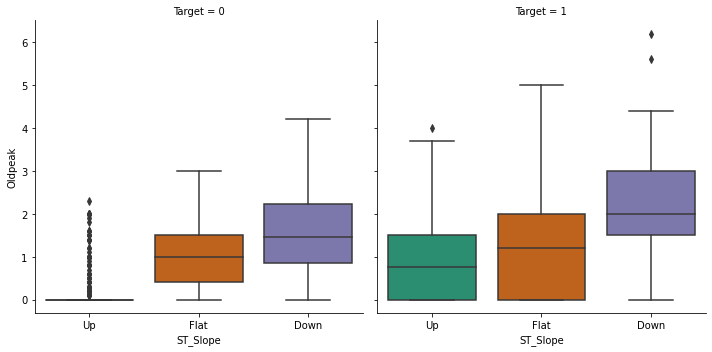

<Figure size 432x288 with 0 Axes>

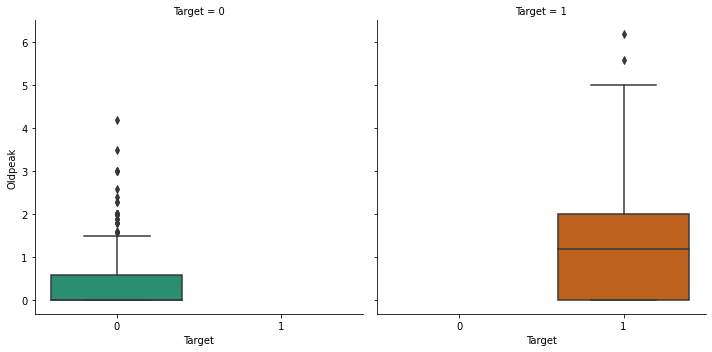

In [61]:
for var in num_columns: 
    for i in cat_columns:
        plt.figure()
        sns.catplot(x=i,y=var,data=heart,kind='box',col='Target',palette='Dark2')   

<AxesSubplot:>

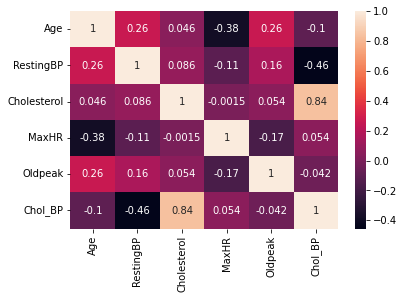

In [62]:
sns.heatmap(heart.corr(), annot=True)

In [ ]:
import statsmodels.api as sm
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
for var in num_columns: 
    qq_plots(heart[var])
    

## Scikit-Learn

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, OneHotEncoder

In [ ]:
X = heart.drop(["Target"],axis = 1)
y = heart['Target']


In [ ]:
categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(exclude='object').columns

In [ ]:
X = pd.get_dummies(data = X, prefix = categorical_columns, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
col_names = X_train.columns

In [ ]:
# You can perform Box Cox or Yeo-Johnson (Non Normal transformation)
bctrans = PowerTransformer(method = 'yeo-johnson').fit(X_train)
X_train = pd.DataFrame(bctrans.transform(X_train),columns = col_names)
X_test = pd.DataFrame(bctrans.transform(X_test),columns = col_names)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns = col_names)
X_test = pd.DataFrame(scaler.transform(X_test),columns = col_names)
X_train.head()

In [ ]:
log_model = LogisticRegression(penalty = 'none')
log_model.fit(X_train,y_train)
log_model.coef_

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix, cohen_kappa_score

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
y_pred_proba = log_model.predict_proba(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
y_test.value_counts()

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
cohen_kappa_score(y_test,y_pred)

In [ ]:
plot_confusion_matrix(log_model,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

In [ ]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

In [ ]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve, roc_auc_score, roc_curve

In [ ]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba[:,1], pos_label = 1)
fpr, tpr, thr

In [ ]:
roc_auc_score(y_test, y_pred_proba[:,1])

In [ ]:
plot_precision_recall_curve(log_model,X_test,y_test)

In [ ]:
plot_roc_curve(log_model,X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(log_model, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(log_model, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(log_model, X, y, cv=10, scoring='roc_auc')

In [ ]:
scores_accuracy,scores_log_loss,scores_auc

In [ ]:
scores_accuracy.mean(),scores_log_loss.mean(), scores_auc.mean()

In [ ]:
logreg100 = LogisticRegression(C=100,  random_state=101)
logreg100.fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

In [ ]:
logreg001 = LogisticRegression(C=0.01,  random_state=101)
logreg001.fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

In [ ]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)


In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.cv_results_)

In [ ]:
from sklearn.feature_selection import RFECV, RFE

In [ ]:
X_train.shape

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=6).fit_transform(X_train, y_train)
print(X_new.head())
X_new1 = SelectPercentile(percentile = 25).fit_transform(X_train, y_train)
print(X_new1.head())

In [ ]:
# cross-validated score for RFE object
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy',min_features_to_select = 5)
rfecv.fit(X_train,y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))
rfecv.grid_scores_

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
#Selected_features = ['Fasting_Blood_Sugar', 'Chol_BP', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
#X_train = X_train[Selected_features]
#X_test = X_test[Selected_features]
plt.subplots(figsize=(16, 10))
sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Using statsmodels

In [ ]:
y_test = pd.DataFrame(y_test)
print(type(y_test))
y_train = pd.DataFrame(y_train)
print(type(y_train))
print(type(X_train))

In [ ]:
X_train.head()

In [ ]:
import statsmodels.api as sm
y_train=y_train.values.reshape(-1,1)
log_reg = sm.Logit(y_train, X_train)
LogReg_Model = log_reg.fit()


In [ ]:
print(LogReg_Model.summary())

In [ ]:
LogReg_Model.pvalues[0:17].plot.bar()
plt.axhline(y = 0.05);

In [ ]:
LogReg_Model.params[0:16].plot.bar();

In [ ]:
quant_df_main = {}
for i in LogReg_Model.params.to_dict().keys():
    if LogReg_Model.pvalues[i] < 0.05:
        quant_df_main[i] = LogReg_Model.params[i]
    else:
        continue
        
quant_df_main

In [ ]:
quant_df_main_odds = {k : np.exp(v) for k, v in quant_df_main.items()}
quant_df_main_odds

In [ ]:
X_test.head()

In [ ]:
yhat = LogReg_Model.predict(X_test)
prediction = list(map(round, yhat))

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, prediction)
cm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[vif["VIF"]>10]["Features"]

In [ ]:
X_train = X_train.drop(vif[vif["VIF"]>10]["Features"],axis = 1)

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X_train)


In [ ]:
X_trans

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

In [ ]:
knn_model.score(X_test,y_test)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
cohen_kappa_score(y_test,y_pred)

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba[:,1])

In [ ]:
np.round(np.sqrt(X_train.shape[0]),0)

In [ ]:
neighbors = np.arange(1, int(np.round(np.sqrt(X_train.shape[0]),0)))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
   
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
    # Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
test_accuracy

In [ ]:
n_neighbors = np.arange(1, int(np.round(np.sqrt(X_train.shape[0]),0)))
weights = ['uniform', 'distance']
leaf_size = [15,20,25,30,35,40,45,50]
p = [1,2,3]
hyperparams = {'weights': weights, 'n_neighbors': n_neighbors, 'leaf_size':leaf_size, 'p':p}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=5, scoring = "roc_auc")
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = np.arange(1, int(np.round(np.sqrt(X_train.shape[0]),0)))
weights = ['uniform', 'distance']
leaf_size = [15,20,25,30,35,40,45,50]
p = [1,2,3]
hyperparams = {'weights': weights, 'n_neighbors': n_neighbors, 'leaf_size':leaf_size, 'p':p}
gd=RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions = hyperparams, verbose=True, n_iter = 30,
                cv=5, scoring = "roc_auc",  random_state = 100)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)


In [ ]:
gd.cv_results_

# Create a PipeLine that contains both a StandardScaler and a KNN model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [ ]:
operations = [('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scale_mean = [True, False]
scale_sd = [True, False]
k_values = list(range(10,20))
p_val = [1,2,3]

In [ ]:
param_grid = {'scaler__with_mean':scale_mean,'scaler__with_std':scale_sd,'knn__n_neighbors': k_values, 'knn__p':p_val}
param_grid

In [ ]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [ ]:
full_cv_classifier.fit(X_train,y_train)

In [ ]:
full_cv_classifier.best_estimator_.get_params()

In [ ]:
full_cv_classifier.cv_results_['mean_test_score']

In [ ]:
pred = full_cv_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
cohen_kappa_score(y_test,pred)

In [ ]:
print(classification_report(y_test,pred))

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC

In [ ]:
model = SVC(kernel='linear', C=1, probability=True, gamma = "auto")
model.fit(X_train, y_train)

In [ ]:
Y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
model = SVC(kernel='linear', C=0.05)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
model = SVC(kernel='sigmoid', C=1)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
model = SVC(kernel='poly', C=1, degree = 1)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
model = SVC(kernel='poly', C=1, degree = 2)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
from sklearn.model_selection import GridSearchCV
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'degree':[2,3,4,5],
                  'C': [0.01,0.1,1, 10, 50, 100,200,300, 1000]}

#gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=5, scoring="accuracy",  verbose = 1)
gsSVMC=RandomizedSearchCV(estimator = SVMC, param_distributions = svc_param_grid, verbose=True, n_iter = 20,
                cv=5, scoring = "roc_auc",  random_state = 100)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [ ]:
gsSVMC.best_estimator_.get_params()

In [ ]:
gsSVMC.cv_results_['mean_test_score']

In [ ]:
pred = gsSVMC.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
cohen_kappa_score(y_test,pred)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.decision_path(X_train)

In [ ]:
base_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,base_pred)

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
print(classification_report(y_test,base_pred))

In [ ]:
model.feature_importances_

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(20,15),dpi=300)
plot_tree(model,filled=True,feature_names=X_train.columns);

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(20,15),dpi=300)
    plot_tree(model,filled=True,feature_names=X.columns);

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train,y_train)

In [ ]:
report_model(pruned_tree)

In [ ]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

In [ ]:
report_model(pruned_tree)

In [ ]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

In [ ]:
report_model(entropy_tree)

In [ ]:
from sklearn.model_selection import GridSearchCV
D_tree = DecisionTreeClassifier()
D_tree_param_grid = {'criterion': ['gini'], 
                  'max_depth': [ 'none', 4,5,6],
                  'min_samples_split':[2,3,4],
                  'min_samples_leaf': [1,2,3]}

#gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=5, scoring="accuracy",  verbose = 1)
#gsDtree=RandomizedSearchCV(estimator = D_tree, param_distributions = D_tree_param_grid, verbose=True, n_iter = 20,
#                cv=5, scoring = "roc_auc",  random_state = 100)
gsDtree=GridSearchCV(estimator = D_tree, param_grid = D_tree_param_grid, verbose=True,
                cv=5, scoring = "roc_auc")

gsDtree.fit(X_train,y_train)

gsDtree_best = gsDtree.best_estimator_

# Best score
gsDtree.best_score_

In [ ]:
gsDtree.best_estimator_.get_params()

In [ ]:
gsDtree.cv_results_['mean_test_score']

In [ ]:
pred = gsDtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
cohen_kappa_score(y_test,pred)

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',random_state=100)
model

In [ ]:
XYZ = model.fit(X_train,y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,preds)

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
model.feature_importances_

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

In [ ]:
test_error = []

for n in range(25,1000,25):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))


In [ ]:
plt.plot(range(25,1000,25),test_error,label='Test Error')
plt.legend()

In [ ]:
test_error

In [ ]:
from sklearn.model_selection import GridSearchCV
RFC = RandomForestClassifier(random_state=100)
param_grid = {'n_estimators':[200,300,400],
             'max_features':[2,3,4,5,6],
             'bootstrap':[True, False],
             'oob_score':[True, False],
             'criterion':['gini','entropy'],
              'min_samples_split':[2,5,8,12],
              'min_samples_leaf': [1,2,3,4,5] } 
gsRFtree=RandomizedSearchCV(estimator = RFC, param_distributions = param_grid, verbose=True, n_iter = 20,
                cv=5, scoring = "accuracy")

gsRFtree.fit(X_train,y_train)

gsDtree_best = gsRFtree.best_estimator_

# Best score
gsRFtree.best_score_

In [ ]:
print(gsRFtree.best_estimator_.get_params())
print(gsRFtree.cv_results_['mean_test_score'])
pred = gsRFtree.predict(X_test)
print(cohen_kappa_score(y_test,pred))

In [ ]:
gsRFtree.cv_results_

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
plot_confusion_matrix(gsRFtree,X_test,y_test)

# Boosted Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"n_estimators":[10,20,40,80,160,320],'max_depth':[3,4,5,6], 'max_features':['auto']}

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
grid = GridSearchCV(gb_model,param_grid)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
plot_confusion_matrix(grid,X_test,y_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
grid.best_estimator_.feature_importances_

In [ ]:
feat_import = grid.best_estimator_.feature_importances_

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats

In [ ]:
imp_feats.sort_values("Importance",ascending=False)

In [ ]:
imp_feats.describe().transpose()

In [ ]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.0005]

In [ ]:
imp_feats.sort_values('Importance')

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param_grid = {'n_estimators':[10,20,40,80,160,320],
              'learning_rate':[0.01,0.05,0.1,0.2, 0.3],
              'min_samples_split':[2,5,8,12],
              'min_samples_leaf': [1,2,3,4,5] ,
              'max_depth':[2,3,4,5],
              'max_features':['auto', 'sqrt', 'log2']} 
gsgbctree=RandomizedSearchCV(estimator = gbc, param_distributions = param_grid, verbose=True, n_iter = 50,
                cv=5, scoring = "accuracy",  random_state = 100)

gsgbctree.fit(X_train,y_train)

gsDtree_best = gsgbctree.best_estimator_

# Best score
gsgbctree.best_score_

In [ ]:
gsgbctree.best_estimator_

In [ ]:
pip install xgboost

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(use_label_encoder=False, 
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=100, # number of trees, default = 100
                      eta=0.3, # this is learning rate, default = 0.3
                      max_depth=6, # maximum depth of the tree, default = 6
                      gamma = 0, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = 1, # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )


In [ ]:
clf = model.fit(X_train, y_train)

In [ ]:
# Predict class labels on training data
pred_labels_tr = model.predict(X_train)
# Predict class labels on a test data
pred_labels_te = model.predict(X_test)

In [ ]:
score_te = model.score(X_test, y_test)
score_te

In [ ]:
score_tr = model.score(X_train, y_train)
score_tr

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {'eta':[0,0.2,0.4,0.6,0.8,1],'gamma':[0,1,2,4,8,16],"n_estimators":[1,5,10,20,40,100],'min_child_weight':[0,1,2,4,8,16],'max_depth':range(2,10),'subsample':[0,0.2,0.4,0.6,0.8,1]}


In [ ]:
grid = RandomizedSearchCV(model,param_distributions=param_grid,scoring = 'accuracy',n_iter = 50)
grid.fit(X_train,y_train)
grid.best_params_


In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


## Naive bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
param_grid = {'alpha':[0,0.25,0.5,0.75,1]}

In [ ]:
grid = GridSearchCV(classifier,param_grid=param_grid)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


In [ ]:
plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
model = Perceptron()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
plot_confusion_matrix(perceptron,X_test,y_test)

In [ ]:
param_grid = {'penalty':['l2','l1','elasticnet'],
             'alpha':[0.001,0.01,0.1,1,10,100],
              'l1_ratio':[0.05,0.15,0.25,0.5,0.75,0.85,0.95]}


In [ ]:
grid = GridSearchCV(model,param_grid=param_grid)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_grid = {'activation':['identity','logistic','tanh','relu'],
             'learning_rate':['constant','invscaling','adaptive'],
              'learning_rate_init':[0.001, 0.005, 0.01],
              'shuffle':[True, False]}

In [ ]:
grid = GridSearchCV(model,param_grid=param_grid)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


# Implementing an end-end project using Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('NN'   , MLPClassifier()))
    
    return basedModels


In [ ]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'NN'  , Pipeline([('Scaler', scaler),('NN'  , MLPClassifier())])  ))


    return pipelines 

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
